# 01. PyTorch Workflow Fundamentals Exercises

Resource: See the exercises notebooks templates and solutions on the course GitHub.

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.7.1


In [3]:
device = "cuda" if torch.cuda.is_available() else "mps"

## 1. Create a straight line dataset using the linear regression formula (weight * X + bias).

- Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.

In [7]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01
X = torch.arange(start=start, end=end, step=step, device=device)
y = weight * X + bias

In [8]:
size = int(0.8 * len(X))

X_train, y_train = X[:size], y[:size]
X_test, y_test = X[size:], y[size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [26]:
X_train.device, y_train.device, X_test.device, y_test.device

(device(type='mps', index=0),
 device(type='mps', index=0),
 device(type='mps', index=0),
 device(type='mps', index=0))

In [44]:
def plot(X_train, y_train, X_test, y_test, predictions) -> None:
    plt.figure(figsize=(10, 7))
    
    plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
    
    plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(X_test, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14});
    plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`.

- Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
- Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its `state_dict()`.
- Note: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [47]:
class MLModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(
            torch.randn(1,
                requires_grad=True,
                dtype=torch.float
            ),
            requires_grad=True
            )
        self.bias = nn.Parameter(
            torch.randn(1,
                requires_grad=True,
                dtype=torch.float
                ),
            requires_grad=True
            )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [48]:
model = MLModel()

In [49]:
model.state_dict()

OrderedDict([('weight', tensor([-0.0221])), ('bias', tensor([0.8306]))])

In [50]:
list(model.parameters())

[Parameter containing:
 tensor([-0.0221], requires_grad=True),
 Parameter containing:
 tensor([0.8306], requires_grad=True)]

In [51]:
model.to(device)

MLModel()

In [52]:
next(model.parameters()).device

device(type='mps', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.

- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [53]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

In [54]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [55]:
epochs = 300

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    if epoch % 20 == 0:
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)

            test_loss = loss_fn(test_pred, y_test)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.19663843512535095 | Test loss: 0.34413665533065796
Epoch: 20 | Loss: 0.05233875662088394 | Test loss: 0.14232368767261505
Epoch: 40 | Loss: 0.04117400199174881 | Test loss: 0.09764361381530762
Epoch: 60 | Loss: 0.034296996891498566 | Test loss: 0.08028418570756912
Epoch: 80 | Loss: 0.027445798739790916 | Test loss: 0.0639566108584404
Epoch: 100 | Loss: 0.020593849942088127 | Test loss: 0.04762909933924675
Epoch: 120 | Loss: 0.013742429204285145 | Test loss: 0.031645454466342926
Epoch: 140 | Loss: 0.006891225464642048 | Test loss: 0.01531787496060133
Epoch: 160 | Loss: 0.0081739267334342 | Test loss: 0.0068209110759198666
Epoch: 180 | Loss: 0.0081739267334342 | Test loss: 0.0068209110759198666
Epoch: 200 | Loss: 0.0081739267334342 | Test loss: 0.0068209110759198666
Epoch: 220 | Loss: 0.0081739267334342 | Test loss: 0.0068209110759198666
Epoch: 240 | Loss: 0.0081739267334342 | Test loss: 0.0068209110759198666
Epoch: 260 | Loss: 0.0081739267334342 | Test loss: 0.0068209

In [56]:
model.state_dict()

OrderedDict([('weight', tensor([0.2971], device='mps:0')),
             ('bias', tensor([0.9093], device='mps:0'))])

In [57]:
weight, bias

(0.3, 0.9)

## 4. Make predictions with the trained model on the test data.

- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [58]:
model.eval()

with torch.inference_mode():
    new_pred = model(X_test)

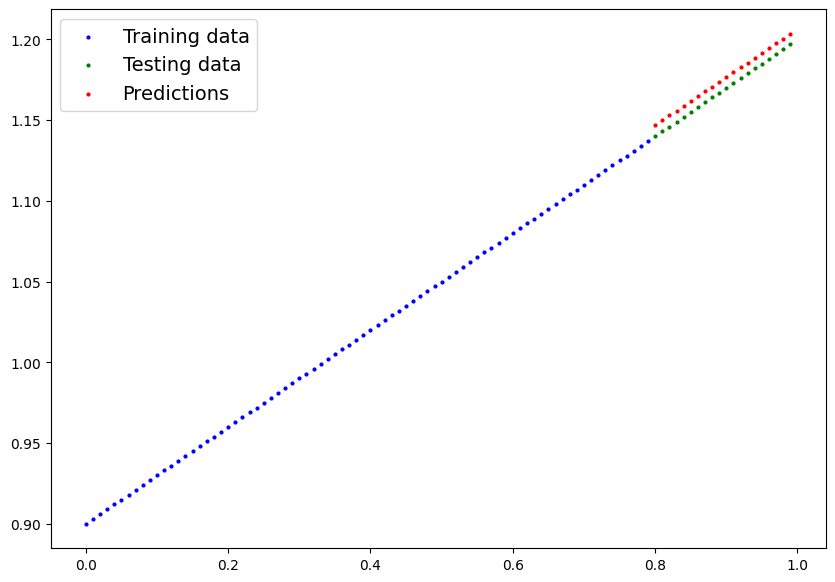

In [59]:
plot(
    X_train.cpu(), 
    y_train.cpu(), 
    X_test.cpu(), 
    y_test.cpu(), 
    new_pred.cpu()
)

## 5. Save your trained model's `state_dict()` to file.

- Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [60]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflows_exercises_model.ipynb"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(
    obj=model.state_dict(),
    f=MODEL_SAVE_PATH
)

Saving model to: models/01_pytorch_workflows_exercises_model.ipynb


In [63]:
loaded_model = MLModel()

loaded_model.load_state_dict(
    torch.load(MODEL_SAVE_PATH)
)

loaded_model.to(device)
next(loaded_model.parameters()).device

device(type='mps', index=0)

In [70]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_pred = loaded_model(X_test)

new_pred == loaded_model_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='mps:0')